# Simple Linear Regression

 Predicting the percentage of marks that student is expected to score based upon the number of hours of studying.

In [123]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('PACKAGES ARE IMPORTED')


PACKAGES ARE IMPORTED


In [124]:
#reading the file 
#file given in the problem statement
#reading csv file
df=pd.read_csv("http://bit.ly/w-data")
print('DATA IS READ')

DATA IS READ


In [125]:
#showing top 10 rows of the raw data
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [126]:
#no. of rows and no. of columns
print(df.shape)

(25, 2)


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [128]:
#summary of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


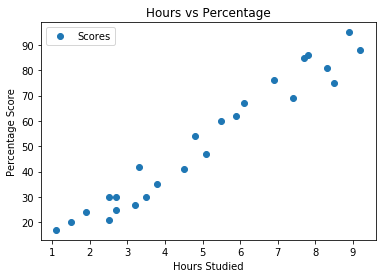

In [129]:
#plotting the graph
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

It is concluded that there is a linear relationship between 'hours of study' and 'percentage scored'

In [130]:
#X is independent and y is dependent variable
X=df.iloc[:,0].values
y=df.iloc[:,1].values

In [133]:
#Splitting the data in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)
X=X.reshape(-1,1)
y=y.reshape(-1,1)


In [134]:
#fitting the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

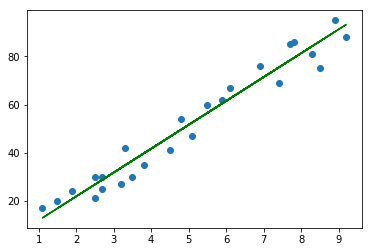

In [135]:
#plotting the regression line 
#Formula of line is y=m*x+c

line=lr.coef_*X+lr.intercept_
plt.scatter(X,y)
plt.plot(X, line,color='green');
plt.show()

# NOW WE WILL START PREDICTING

In [136]:
#predictions
y_pred=lr.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [137]:
#predicting student's score for given value of 9.25 hrs in the problem statement
hours=float(input("Enter hours of study ="))
features=np.array([[hours]])
own_pred=lr.predict(features)
print("Predicted Score = {}".format(own_pred[0]))

Enter hours of study =9.25
Predicted Score = [93.69173249]


EVALUATING THE MODEL

In [138]:
#calculating errors
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# RESULT

If a student study for 9.25hrs in a day then he will score 93.69 percent, according to this model.